In [1]:
from plotnine import *
import numpy as np
import pandas as pd

# This notebook helps to validate our tracings:

All times in ms!

In [2]:
! ls STATS/runner-001

config.fti			   timing-events.runner-001-app.0.csv
nulltime.runner-001-app.0.csv	   timing-events.runner-001-app.1.csv
nulltime.runner-001-app.1.csv	   timing-events.runner-001-head.0.csv
nulltime.runner-001-head.0.csv	   trace.runner-001-app.0.csv
runner-001.run-information.csv	   trace.runner-001-app.1.csv
runner-001.timing-information.csv  trace.runner-001-head.0.csv


In [3]:
STATS= 'STATS.lucky.with_sleep0'
STATS= 'STATS.2'
STATS= 'STATS'
runner = '001'
df_app = pd.read_csv(f'{STATS}/runner-{runner}/trace.runner-{runner}-app.0.csv')
df_app.head()

,rank,start_time,end_time,region,parameter
0,0,10115.330587,19225.421711,Propagation,-1
1,0,10114.118876,19225.430609,_INIT,0
2,0,19225.446177,19230.408363,_STORE,0
3,0,19230.410430,19624.161616,_CALC_WEIGHT,0
4,0,19624.164167,19624.198845,_PUSH_WEIGHT_TO_HEAD,0


In [311]:
# p = ggplot(df)
# p += geom_rect(aes(xmin='start_time', xmax='end_time', ymin=0, ymax=1, fill='region', group='region'), colour='black', alpha=0.5)
# p

## Runner 
### App Core

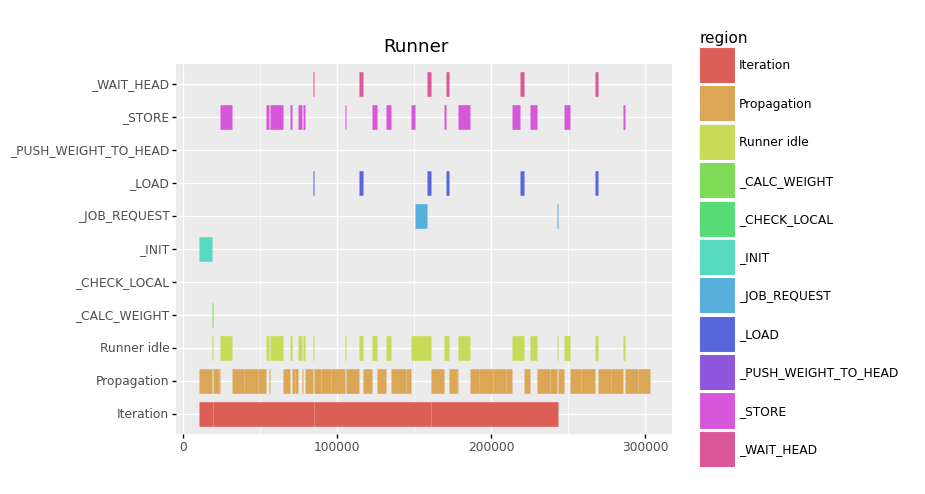

<ggplot: (-9223363291222743755)>

In [313]:
p = ggplot(df_app)

# rem: factor = pd.Categorical
p += geom_rect(aes(xmin='start_time', xmax='end_time', ymin='region',
                   ymax='region', 
                   fill='region', colour='region', line_pattern='region'), 
               size=10, alpha=1)
p += ggtitle("Runner")
p

- WAIT_HEAD and load is almost the same!
- WAIT head contains waiting for the head after a load request
- LOAD is loading until next calculation can stbe started
- iteration switches to the next if there is another assimilation_cycle that starts 
- job_request on rank0 contains communication to server + sync with other simulation ranks

### Propagation time seen from the app cores:

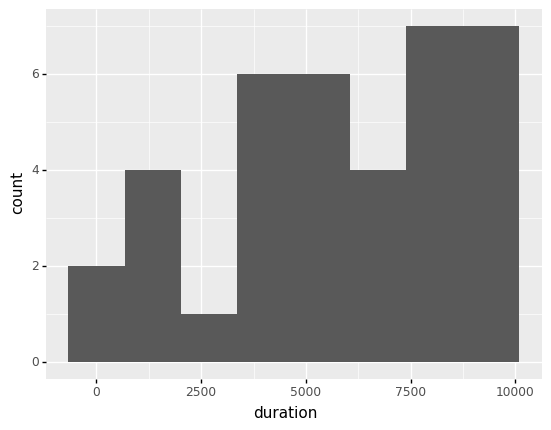

<ggplot: (-9223363291222668316)>

In [314]:
df_app['duration'] = df_app['end_time'] - df_app['start_time']
p = ggplot(df_app[df_app['region'] == 'Propagation'])

p += geom_histogram(aes(x='duration'), bins = 8)
#p += xlim(0,5)
p

## Local hits vs local misses:

In [315]:
df_ter = pd.read_csv(f'{STATS}/runner-{runner}/timing-events.runner-{runner}-app.0.csv')
# hits    /   (misses + hits)
len(df_ter[df_ter['event'] == 59]) / (len(df_ter[df_ter['event'] == 60]) + len(df_ter[df_ter['event'] == 59]))

0.8333333333333334

## Peer hits vs peer misses:

In [316]:
df_teh = pd.read_csv(f'{STATS}/runner-{runner}/timing-events.runner-{runner}-head.0.csv')
# hits    /   (misses + hits)
print(len(df_teh[df_teh['event'] == 56]) / (len(df_teh[df_teh['event'] == 56]) + len(df_teh[df_teh['event'] == 57])), 
      ',', len(df_teh[df_teh['event'] == 57]), 'misses')

0.0 , 26 misses


**This is a Problem!**
- could change with more slots / more runners
- could try to let it prefetch stuff that is on other runners?

### FTI HEAD

In [317]:
df_head = pd.read_csv(f'{STATS}/runner-{runner}/trace.runner-{runner}-head.0.csv')
df_head.head()

,rank,start_time,end_time,region,parameter
0,0,9990.515287,9992.942225,_INIT,0
1,0,19005.409270,19005.489749,_CHECK_LOCAL,0
2,0,19005.502919,19020.549273,_PUSH_STATE_TO_PFS,0
3,0,19030.097192,19034.824400,_PREFETCH_REQ,0
4,0,19030.041258,19034.844515,_PREFETCH,0


In [318]:
df_head[df_head['region'] == '_DELETE_PFS']

,rank,start_time,end_time,region,parameter


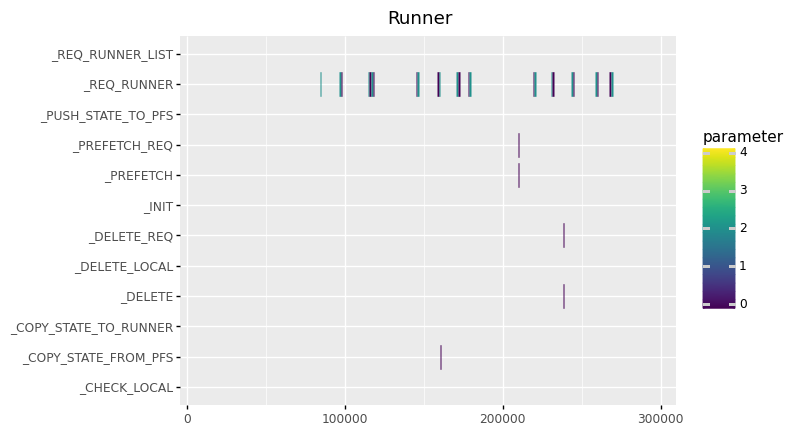

<ggplot: (-9223363291222100543)>

In [319]:
p = ggplot(df_head)

# rem: factor = pd.Categorical
p += geom_rect(aes(xmin='start_time', xmax='end_time', ymin='region',
                   ymax='region', 
                   fill='parameter', colour='parameter', line_pattern='region'), 
               size=10, alpha=1)
p += ggtitle("Runner")
p

## Server

In [4]:
!ls STATS

Global		      runner-000.log  runner-003
Local		      runner-001      runner-003.log
melissa_launcher.log  runner-001.log  server.log.1
Meta		      runner-002      trace.melissa_p2p_server.csv
runner-000	      runner-002.log


In [5]:
df_server = pd.read_csv(f'{STATS}/trace.melissa_p2p_server.csv')
df_server

,start_time,end_time,region,parameter
0,5880.511999,5880.551338,_HANDLE_JOB_REQ,0
1,5884.744167,5884.768248,_HANDLE_JOB_REQ,0
2,5888.958693,5888.984919,_HANDLE_JOB_REQ,0
3,5893.214226,5893.239021,_HANDLE_JOB_REQ,0
4,5897.402048,5897.425890,_HANDLE_JOB_REQ,0
...,...,...,...,...
26842,121981.735706,121981.760979,_HANDLE_JOB_REQ,0
26843,121985.927820,121985.952616,_HANDLE_JOB_REQ,0
26844,121990.141153,121990.166426,_HANDLE_JOB_REQ,0
26845,121994.354248,121994.375706,_HANDLE_JOB_REQ,0


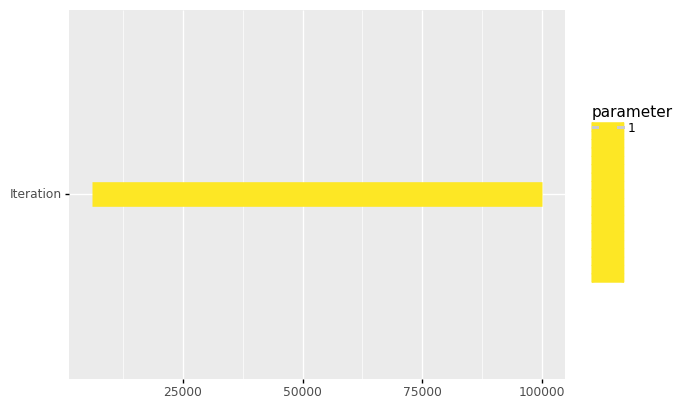

<ggplot: (-9223363305580348121)>

In [6]:
p = ggplot(df_server[df_server['region'] == 'Iteration'])

# rem: factor = pd.Categorical
p += geom_rect(aes(xmin='start_time', xmax='end_time', ymin='region',
                   ymax='region', 
                   fill='parameter', colour='parameter'), 
               size=10, alpha=1)

p

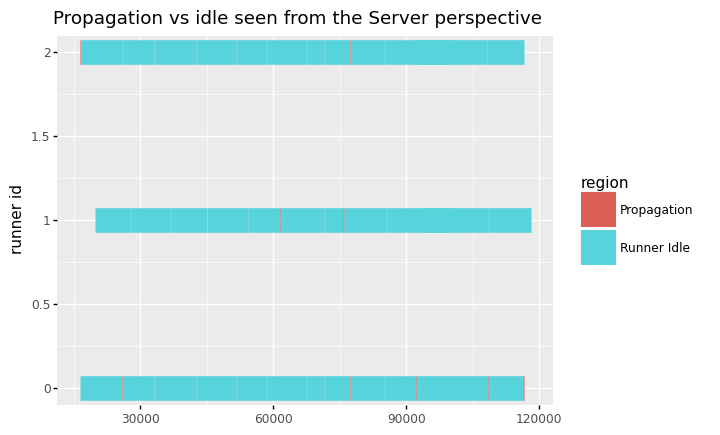

<ggplot: (8731273759629)>

In [7]:
p = ggplot(df_server[(df_server['region'] == 'Propagation') | (df_server['region'] == 'Runner Idle')])

# rem: factor = pd.Categorical
p += geom_rect(aes(xmin='start_time', xmax='end_time', ymin='parameter',
                   ymax='parameter', 
                   fill='region', colour='region'), 
               size=10, alpha=1)
p += ylab('runner id')
p += ggtitle("Propagation vs idle seen from the Server perspective")
p

## As Histogram:

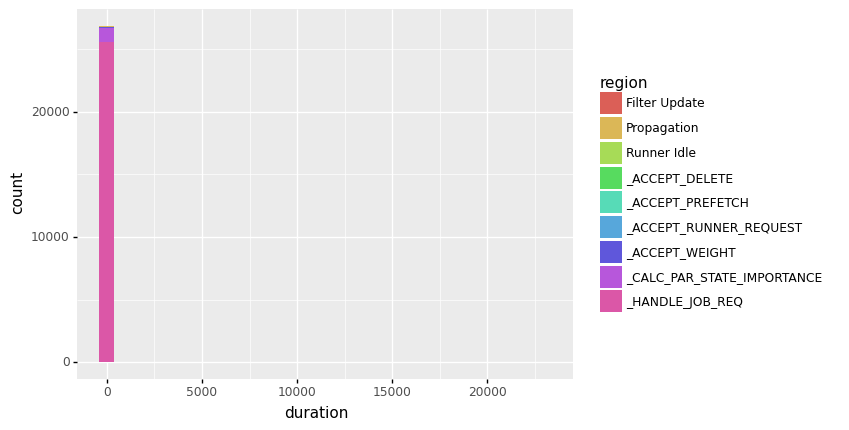

<ggplot: (8731273511919)>

In [8]:
df_server['duration'] = df_server['end_time'] - df_server['start_time']
p = ggplot(df_server[df_server['region'] != 'Iteration'])

p += geom_histogram(aes(x='duration', fill='region'), bins=30)
#p += xlim(0,5)
p

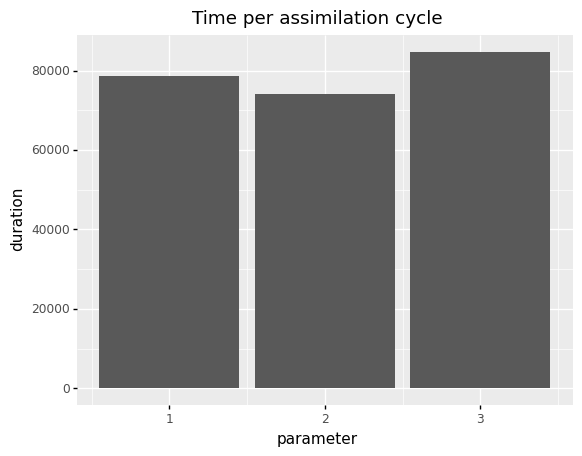

<ggplot: (-9223363291337847594)>

In [325]:
p = ggplot(df_server[df_server['region'] == 'Iteration'])

p += geom_col(aes(x='parameter', y='duration'))
#p += xlim(0,5)
p += ggtitle('Time per assimilation cycle')
p

In [ ]:
df_server[df_server['region'] == 'Iteration']

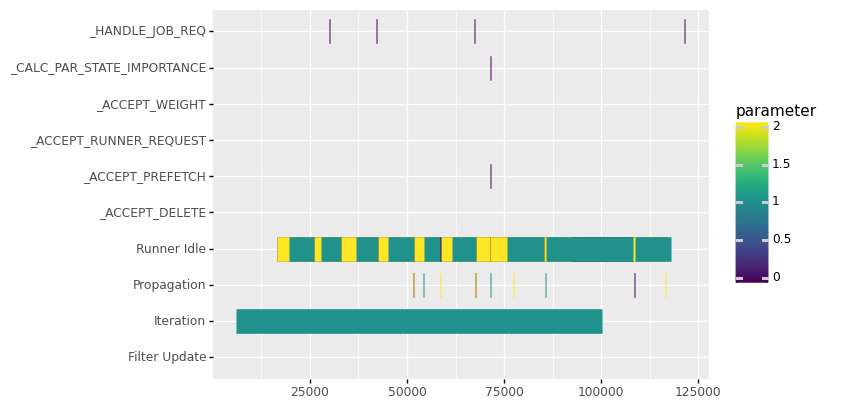

<ggplot: (8731274435087)>

In [10]:
p = ggplot(df_server)

# rem: factor = pd.Categorical
p += geom_rect(aes(xmin='start_time', xmax='end_time', ymin='region',
                   ymax='region', 
                   fill='parameter', colour='parameter'), 
               size=10, alpha=1)

p